In [6]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import circuit_drawer

def build_circ(_circuit, _register, _params, _n_qubits, _barrier = False):
    """
    Implements a parametrized quantum circuit in the _register chosen.
    """

    for index in range(_n_qubits):
        _circuit.h(index)
        _circuit.rx(_params[index], _register[index])

    # a few CNOT gates
    for k in range(_n_qubits - 1):
        _circuit.cx(_register[k], _register[k+1])

    if _barrier:
        _circuit.barrier()

    return _circuit

# Then build the circuits for |psi> and |phi>
nqubits = 3
nb_params = nqubits

# |psi>
q = QuantumRegister(nqubits, 'qubit')
circ_psi = QuantumCircuit(q)
params_psi = [el for el in range( nb_params )]
circ_psi = build_circ(circ_psi, q, params_psi, nqubits)

# |phi>
p = QuantumRegister(nqubits, 'qubit')
circ_phi = QuantumCircuit(p)
params_phi = [el for el in range( nb_params, 2*nb_params)]
circ_phi = build_circ(circ_phi, p, params_phi, nqubits)

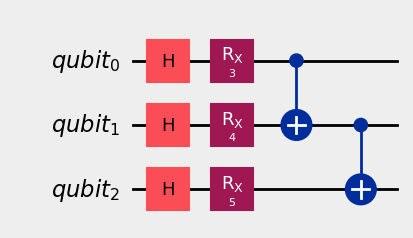

In [7]:
circuit_drawer(circ_phi, output='mpl', style={'backgroundcolor': '#EEEEEE'})


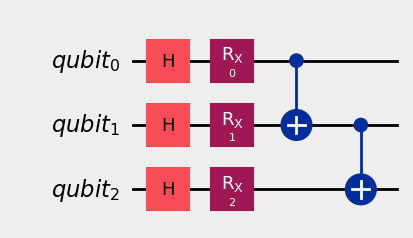

In [8]:
circuit_drawer(circ_psi, output='mpl', style={'backgroundcolor': '#EEEEEE'})


In [9]:
# Append it to the existing psi circuit, then extract it
U_phi_dagger = circ_phi.to_gate(label = "U_phi^dagger").inverse()
definition = [ q[index] for index in range(nqubits) ]
U_circ = circ_psi.copy()
U_circ.append(U_phi_dagger, definition)

# Then create a controlled gate out of it
U_controlled_gate = (U_circ.to_gate(label = "U")).control(1)

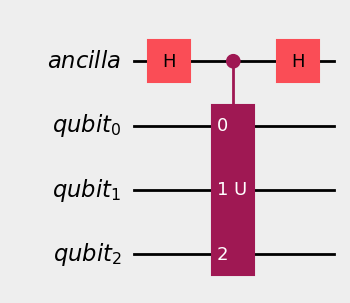

In [10]:
U_controlled_gate = (U_circ.to_gate(label = "U")).control(1)

anc = QuantumRegister(1, 'ancilla')
q = QuantumRegister(nqubits, 'qubit')
circ_Hadamard = QuantumCircuit(anc, q)
definition = [anc[0]] + [q[index] for index in range(nqubits)]


evaluate_complex_part = False # replace by True if you want the complex part

circ_Hadamard.h(anc[0])
if evaluate_complex_part:
    circ_Hadamard.sdg(anc[0])

circ_Hadamard.append(U_controlled_gate, definition)
circ_Hadamard.h(anc[0])

# visualize it
circuit_drawer(circ_Hadamard, output='mpl', style={'backgroundcolor': '#EEEEEE'})